In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
fhv = pd.read_csv('../data/FHV_Base_Aggregate_Report.csv')

# Setting up my base dataframe

In [3]:
#Datetime shenanighans
fhv['day'] = 1
fhv['timestamp'] = pd.to_datetime(fhv[['Year', 'Month', 'day']])
fhv['timestamp'] = fhv['timestamp'].apply(lambda x: x.strftime('%Y-%m'))

#Making the dataframe look how I want
fhv = fhv[['Base License Number', 'Base Name', 'DBA', 'timestamp', 'Year', 'Month', 'Month Name',
          'Total Dispatched Trips', 'Total Dispatched Shared Trips', 'Unique Dispatched Vehicles']]

In [4]:
fhv.to_csv('../data/fhv.csv')
fhv

,Base License Number,Base Name,DBA,timestamp,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
0,B01391,ROSE 'N' DALE C/S INC,NaN,2015-06,2015,6,June,4008,0,15
1,B00789,VITAL TRANSPORTATION INC.,NaN,2016-01,2016,1,January,15116,0,273
2,B02311,FAST CITY CAR & LIMO SVC INC.,NaN,2021-03,2021,3,March,2754,0,20
3,B02292,NEW YORK APPLE V.I.P. CORP,NaN,2017-08,2017,8,August,2254,0,10
4,B01821,EMPIRE TRANSPORTATION SERVICE INC.,NaN,2020-09,2020,9,September,512,0,5
...,...,...,...,...,...,...,...,...,...,...
39963,B02826,NEW BELL LUXURY CORP,NaN,2019-06,2019,6,June,4826,0,36
39964,B03102,METRO LUXURY INC,NaN,2019-06,2019,6,June,739,0,2
39965,B01741,MONACO LIMO & CAR SERVICES INC.,NaN,2015-04,2015,4,April,2399,0,21
39966,B02793,SEAVIEW ISLAND CAR SERVICE,NaN,2017-12,2017,12,December,278,0,4


# All trips in general

In [5]:
yearly_trip_totals = fhv.groupby('Year')['Total Dispatched Trips'].sum().reset_index()
yearly_trip_totals

,Year,Total Dispatched Trips
0,2015,61122763
1,2016,128295379
2,2017,189259245
3,2018,260424181
4,2019,279578879
5,2020,158168599
6,2021,154491469


In [41]:
monthly_trip_totals = fhv.groupby('timestamp')['Total Dispatched Trips'].sum().reset_index()
monthly_trip_totals.sort_values(by = 'Total Dispatched Trips', ascending = False)

,timestamp,Total Dispatched Trips
50,2019-03,25316006
48,2019-01,25135605
52,2019-05,24379790
59,2019-12,24262028
47,2018-12,23877851
...,...,...
3,2015-04,3769043
4,2015-05,3284309
2,2015-03,3182179
1,2015-02,3023057


In [7]:
yearly_shared_trips_totals = fhv.groupby('Year')['Total Dispatched Shared Trips'].sum().reset_index()
yearly_shared_trips_totals

,Year,Total Dispatched Shared Trips
0,2015,0
1,2016,0
2,2017,18708848
3,2018,57877491
4,2019,45399619
5,2020,6896351
6,2021,79522


In [8]:
monthly_shared_trips_totals = fhv.groupby('timestamp')['Total Dispatched Shared Trips'].sum().reset_index()
monthly_shared_trips_totals

,timestamp,Total Dispatched Shared Trips
0,2015-01,0
1,2015-02,0
2,2015-03,0
3,2015-04,0
4,2015-05,0
...,...,...
77,2021-06,3743
78,2021-07,19711
79,2021-08,22432
80,2021-09,25022


In [9]:
yearly_vehicle_total = fhv.groupby('Year')['Unique Dispatched Vehicles'].sum().reset_index()
yearly_vehicle_total

,Year,Unique Dispatched Vehicles
0,2015,478697
1,2016,1027268
2,2017,1566650
3,2018,1928812
4,2019,2003307
5,2020,1072771
6,2021,1006644


In [10]:
yearly_vehicle_avg = fhv.groupby('Year')['Unique Dispatched Vehicles'].mean().reset_index()
yearly_vehicle_avg

,Year,Unique Dispatched Vehicles
0,2015,161.068977
1,2016,192.300262
2,2017,234.880060
3,2018,267.333611
4,2019,316.328280
5,2020,172.943898
6,2021,192.364609


In [11]:
monthly_vehicle_totals = fhv.groupby('timestamp')['Unique Dispatched Vehicles'].sum().reset_index()
monthly_vehicle_totals

,timestamp,Unique Dispatched Vehicles
0,2015-01,20345
1,2015-02,21171
2,2015-03,22137
3,2015-04,30986
4,2015-05,28296
...,...,...
77,2021-06,103857
78,2021-07,104332
79,2021-08,105653
80,2021-09,115028


# Split based by company

In [12]:
fhv

,Base License Number,Base Name,DBA,timestamp,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
0,B01391,ROSE 'N' DALE C/S INC,NaN,2015-06,2015,6,June,4008,0,15
1,B00789,VITAL TRANSPORTATION INC.,NaN,2016-01,2016,1,January,15116,0,273
2,B02311,FAST CITY CAR & LIMO SVC INC.,NaN,2021-03,2021,3,March,2754,0,20
3,B02292,NEW YORK APPLE V.I.P. CORP,NaN,2017-08,2017,8,August,2254,0,10
4,B01821,EMPIRE TRANSPORTATION SERVICE INC.,NaN,2020-09,2020,9,September,512,0,5
...,...,...,...,...,...,...,...,...,...,...
39963,B02826,NEW BELL LUXURY CORP,NaN,2019-06,2019,6,June,4826,0,36
39964,B03102,METRO LUXURY INC,NaN,2019-06,2019,6,June,739,0,2
39965,B01741,MONACO LIMO & CAR SERVICES INC.,NaN,2015-04,2015,4,April,2399,0,21
39966,B02793,SEAVIEW ISLAND CAR SERVICE,NaN,2017-12,2017,12,December,278,0,4


In [13]:
yearly_company_trip_totals = fhv.groupby(['Year', 'Base Name'])['Total Dispatched Trips'].sum().reset_index()
yearly_company_trip_totals

,Year,Base Name,Total Dispatched Trips
0,2015,128 BLUE BIRD TRANSPORT INC.,6390
1,2015,"12TH STREET LUXURY CARS, INC.",919
2,2015,185 MALTA CAR SERVICE LLC,6083
3,2015,3210 WEBSTER AV PRESTIGE C/S,296728
4,2015,440 CAR SERVICE INC.,16451
...,...,...,...
4465,2021,YUR DRIVERS NETWORK INC,3853
4466,2021,ZION CAR SERVICE INC.,7064
4467,2021,ZIP CONNECTIONS INC,561
4468,2021,ZPI CORPORATION,2449


In [14]:
monthly_company_trip_totals = fhv.groupby(['timestamp', 'Base Name'])['Total Dispatched Trips'].sum().reset_index()
monthly_company_trip_totals

,timestamp,Base Name,Total Dispatched Trips
0,2015-01,A NEW DAY RAD DISP INC,32400
1,2015-01,AAA FAMILY LIMOUSINE SERVICE INC,1
2,2015-01,"ALLSTATE PRIVATE CAR & LIMO,INC",29447
3,2015-01,APOLLO RADIO DISPATCH INC.,18863
4,2015-01,ARECIBO C/S INC,25341
...,...,...,...
39725,2021-10,YUR DRIVERS NETWORK INC,497
39726,2021-10,ZION CAR SERVICE INC.,758
39727,2021-10,ZIP CONNECTIONS INC,168
39728,2021-10,ZPI CORPORATION,437


In [15]:
yearly_company_shared_trips_totals = fhv.groupby(['Year', 'Base Name'])['Total Dispatched Shared Trips'].sum().reset_index()
yearly_company_shared_trips_totals

,Year,Base Name,Total Dispatched Shared Trips
0,2015,128 BLUE BIRD TRANSPORT INC.,0
1,2015,"12TH STREET LUXURY CARS, INC.",0
2,2015,185 MALTA CAR SERVICE LLC,0
3,2015,3210 WEBSTER AV PRESTIGE C/S,0
4,2015,440 CAR SERVICE INC.,0
...,...,...,...
4465,2021,YUR DRIVERS NETWORK INC,0
4466,2021,ZION CAR SERVICE INC.,0
4467,2021,ZIP CONNECTIONS INC,0
4468,2021,ZPI CORPORATION,0


In [16]:
monthly_company_shared_trips_totals = fhv.groupby(['timestamp', 'Base Name'])['Total Dispatched Shared Trips'].sum().reset_index()
monthly_company_shared_trips_totals

,timestamp,Base Name,Total Dispatched Shared Trips
0,2015-01,A NEW DAY RAD DISP INC,0
1,2015-01,AAA FAMILY LIMOUSINE SERVICE INC,0
2,2015-01,"ALLSTATE PRIVATE CAR & LIMO,INC",0
3,2015-01,APOLLO RADIO DISPATCH INC.,0
4,2015-01,ARECIBO C/S INC,0
...,...,...,...
39725,2021-10,YUR DRIVERS NETWORK INC,0
39726,2021-10,ZION CAR SERVICE INC.,0
39727,2021-10,ZIP CONNECTIONS INC,0
39728,2021-10,ZPI CORPORATION,0


In [17]:
yearly_company_vehicle_avg = fhv.groupby(['Year', 'Base Name'])['Unique Dispatched Vehicles'].mean().reset_index()
yearly_company_vehicle_avg

,Year,Base Name,Unique Dispatched Vehicles
0,2015,128 BLUE BIRD TRANSPORT INC.,8.000000
1,2015,"12TH STREET LUXURY CARS, INC.",18.857143
2,2015,185 MALTA CAR SERVICE LLC,16.000000
3,2015,3210 WEBSTER AV PRESTIGE C/S,651.500000
4,2015,440 CAR SERVICE INC.,39.500000
...,...,...,...
4465,2021,YUR DRIVERS NETWORK INC,6.800000
4466,2021,ZION CAR SERVICE INC.,4.000000
4467,2021,ZIP CONNECTIONS INC,7.000000
4468,2021,ZPI CORPORATION,2.900000


In [18]:
monthly_company_vehicle_totals = fhv.groupby(['timestamp', 'Base Name'])['Unique Dispatched Vehicles'].sum().reset_index()
monthly_company_vehicle_totals

,timestamp,Base Name,Unique Dispatched Vehicles
0,2015-01,A NEW DAY RAD DISP INC,250
1,2015-01,AAA FAMILY LIMOUSINE SERVICE INC,1
2,2015-01,"ALLSTATE PRIVATE CAR & LIMO,INC",147
3,2015-01,APOLLO RADIO DISPATCH INC.,125
4,2015-01,ARECIBO C/S INC,146
...,...,...,...
39725,2021-10,YUR DRIVERS NETWORK INC,6
39726,2021-10,ZION CAR SERVICE INC.,4
39727,2021-10,ZIP CONNECTIONS INC,9
39728,2021-10,ZPI CORPORATION,4


# Deeper diving analysis

In [19]:
#First time a company will appear on the list (their first report)
first = fhv.sort_values(by='timestamp', ascending = True).groupby('Base Name').first().reset_index()

#The last time a company will appear on the list (their most recent report)
last = fhv.sort_values(by='timestamp', ascending = True).groupby('Base Name').last().reset_index()

In [20]:
first

,Base Name,Base License Number,DBA,timestamp,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
0,128 BLUE BIRD TRANSPORT INC.,B00054,LATCH CAR SERVICE,2015-11,2015,11,November,3368,0,8
1,"12TH STREET LUXURY CARS, INC.",B02160,None,2015-06,2015,6,June,318,0,21
2,185 MALTA CAR SERVICE LLC,B02557,None,2015-10,2015,10,October,291,0,16
3,28 EXPRESS INC.,B03135,None,2019-03,2019,3,March,13,0,1
4,2S LUXURY INC.,B03287,None,2020-08,2020,8,August,425,0,5
...,...,...,...,...,...,...,...,...,...,...
913,ZION CAR SERVICE INC.,b01029,None,2015-11,2015,11,November,50,0,4
914,ZIP CONNECTIONS INC,B03296,None,2021-03,2021,3,March,21,0,3
915,ZOOM CAR SERVICE INC.,B02717,None,2015-10,2015,10,October,1469,0,7
916,ZPI CORPORATION,B00290,NATIONAL HIGH CLASS,2016-04,2016,4,April,3818,0,31


In [21]:
last

,Base Name,Base License Number,DBA,timestamp,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
0,128 BLUE BIRD TRANSPORT INC.,B00054,LATCH CAR SERVICE,2021-09,2021,9,September,92,0,1
1,"12TH STREET LUXURY CARS, INC.",B02160,None,2018-07,2018,7,July,5,0,1
2,185 MALTA CAR SERVICE LLC,B02557,None,2021-09,2021,9,September,4751,0,15
3,28 EXPRESS INC.,B03135,None,2020-03,2020,3,March,37,0,1
4,2S LUXURY INC.,B03287,None,2021-10,2021,10,October,253,0,6
...,...,...,...,...,...,...,...,...,...,...
913,ZION CAR SERVICE INC.,B01029,None,2021-10,2021,10,October,758,0,4
914,ZIP CONNECTIONS INC,B03296,None,2021-10,2021,10,October,168,0,9
915,ZOOM CAR SERVICE INC.,B02717,None,2018-12,2018,12,December,301,0,1
916,ZPI CORPORATION,B00290,NATIONAL HIGH CLASS,2021-10,2021,10,October,437,0,4


In [22]:
#Only looking at companies who have been reporting during Covid
during_covid = last['Base Name'].loc[last.timestamp >= '2020-01'].reset_index(drop = True)
fhv_during_covid = fhv.loc[fhv['Base Name'].isin(during_covid)].reset_index(drop = True)
fhv_during_covid

,Base License Number,Base Name,DBA,timestamp,Year,Month,Month Name,Total Dispatched Trips,Total Dispatched Shared Trips,Unique Dispatched Vehicles
0,B01391,ROSE 'N' DALE C/S INC,NaN,2015-06,2015,6,June,4008,0,15
1,B00789,VITAL TRANSPORTATION INC.,NaN,2016-01,2016,1,January,15116,0,273
2,B02311,FAST CITY CAR & LIMO SVC INC.,NaN,2021-03,2021,3,March,2754,0,20
3,B02292,NEW YORK APPLE V.I.P. CORP,NaN,2017-08,2017,8,August,2254,0,10
4,B01821,EMPIRE TRANSPORTATION SERVICE INC.,NaN,2020-09,2020,9,September,512,0,5
...,...,...,...,...,...,...,...,...,...,...
35704,B00053,CHARGE AND RIDE INC,NaN,2018-10,2018,10,October,880,0,48
35705,B02737,BWJ GROUP INC,NaN,2017-12,2017,12,December,3711,0,18
35706,B02826,NEW BELL LUXURY CORP,NaN,2019-06,2019,6,June,4826,0,36
35707,B03102,METRO LUXURY INC,NaN,2019-06,2019,6,June,739,0,2


## General analysis with new dataset

In [23]:
covid_yearly_trip_totals = fhv_during_covid.groupby('Year')['Total Dispatched Trips'].sum().reset_index()
covid_yearly_trip_totals

,Year,Total Dispatched Trips
0,2015,59755684
1,2016,122540957
2,2017,176958509
3,2018,245352095
4,2019,271429026
5,2020,158168599
6,2021,154491469


In [24]:
covid_monthly_trip_totals = fhv_during_covid.groupby('timestamp')['Total Dispatched Trips'].sum().reset_index()
covid_monthly_trip_totals

,timestamp,Total Dispatched Trips
0,2015-01,2676780
1,2015-02,2994527
2,2015-03,3148809
3,2015-04,3695941
4,2015-05,3194926
...,...,...
77,2021-06,16264486
78,2021-07,16261550
79,2021-08,15695408
80,2021-09,15975710


In [25]:
covid_yearly_shared_trip_totals = fhv_during_covid.groupby('Year')['Total Dispatched Shared Trips'].sum().reset_index()
covid_yearly_shared_trip_totals

,Year,Total Dispatched Shared Trips
0,2015,0
1,2016,0
2,2017,18708848
3,2018,57873067
4,2019,45399619
5,2020,6896351
6,2021,79522


In [26]:
covid_monthly_shared_trip_totals = fhv_during_covid.groupby('timestamp')['Total Dispatched Shared Trips'].sum().reset_index()
covid_monthly_shared_trip_totals

,timestamp,Total Dispatched Shared Trips
0,2015-01,0
1,2015-02,0
2,2015-03,0
3,2015-04,0
4,2015-05,0
...,...,...
77,2021-06,3743
78,2021-07,19711
79,2021-08,22432
80,2021-09,25022


In [27]:
covid_yearly_vehicle_avg = fhv_during_covid.groupby('Year')['Unique Dispatched Vehicles'].mean().reset_index()
covid_yearly_vehicle_avg

,Year,Unique Dispatched Vehicles
0,2015,196.315925
1,2016,206.475391
2,2017,240.408410
3,2018,268.476584
4,2019,307.406809
5,2020,172.943898
6,2021,192.364609


In [28]:
covid_monthly_vehicle_totals = fhv_during_covid.groupby('timestamp')['Unique Dispatched Vehicles'].sum().reset_index()
covid_monthly_vehicle_totals

,timestamp,Unique Dispatched Vehicles
0,2015-01,19990
1,2015-02,20633
2,2015-03,21646
3,2015-04,29657
4,2015-05,26837
...,...,...
77,2021-06,103857
78,2021-07,104332
79,2021-08,105653
80,2021-09,115028


## Company analysis with new dataset

In [29]:
covid_yearly_company_trip_totals = fhv_during_covid.groupby(['Year', 'Base Name'])['Total Dispatched Trips'].sum().reset_index()
covid_yearly_company_trip_totals

,Year,Base Name,Total Dispatched Trips
0,2015,128 BLUE BIRD TRANSPORT INC.,6390
1,2015,185 MALTA CAR SERVICE LLC,6083
2,2015,3210 WEBSTER AV PRESTIGE C/S,296728
3,2015,440 CAR SERVICE INC.,16451
4,2015,"49 WESTCHESTER SQUARE PRESTIGE CAR SERVICE, CORP.",69884
...,...,...,...
3856,2021,YUR DRIVERS NETWORK INC,3853
3857,2021,ZION CAR SERVICE INC.,7064
3858,2021,ZIP CONNECTIONS INC,561
3859,2021,ZPI CORPORATION,2449


In [30]:
covid_monthly_company_trip_totals = fhv_during_covid.groupby(['timestamp', 'Base Name'])['Total Dispatched Trips'].sum().reset_index()
covid_monthly_company_trip_totals

,timestamp,Base Name,Total Dispatched Trips
0,2015-01,A NEW DAY RAD DISP INC,32400
1,2015-01,AAA FAMILY LIMOUSINE SERVICE INC,1
2,2015-01,"ALLSTATE PRIVATE CAR & LIMO,INC",29447
3,2015-01,APOLLO RADIO DISPATCH INC.,18863
4,2015-01,ARECIBO C/S INC,25341
...,...,...,...
35466,2021-10,YUR DRIVERS NETWORK INC,497
35467,2021-10,ZION CAR SERVICE INC.,758
35468,2021-10,ZIP CONNECTIONS INC,168
35469,2021-10,ZPI CORPORATION,437


In [31]:
covid_yearly_company_shared_trips_totals = fhv_during_covid.groupby(['Year', 'Base Name'])['Total Dispatched Shared Trips'].sum().reset_index()
covid_yearly_company_shared_trips_totals

,Year,Base Name,Total Dispatched Shared Trips
0,2015,128 BLUE BIRD TRANSPORT INC.,0
1,2015,185 MALTA CAR SERVICE LLC,0
2,2015,3210 WEBSTER AV PRESTIGE C/S,0
3,2015,440 CAR SERVICE INC.,0
4,2015,"49 WESTCHESTER SQUARE PRESTIGE CAR SERVICE, CORP.",0
...,...,...,...
3856,2021,YUR DRIVERS NETWORK INC,0
3857,2021,ZION CAR SERVICE INC.,0
3858,2021,ZIP CONNECTIONS INC,0
3859,2021,ZPI CORPORATION,0


In [32]:
covid_monthly_company_shared_trips_totals = fhv_during_covid.groupby(['timestamp', 'Base Name'])['Total Dispatched Shared Trips'].sum().reset_index()
covid_monthly_company_shared_trips_totals

,timestamp,Base Name,Total Dispatched Shared Trips
0,2015-01,A NEW DAY RAD DISP INC,0
1,2015-01,AAA FAMILY LIMOUSINE SERVICE INC,0
2,2015-01,"ALLSTATE PRIVATE CAR & LIMO,INC",0
3,2015-01,APOLLO RADIO DISPATCH INC.,0
4,2015-01,ARECIBO C/S INC,0
...,...,...,...
35466,2021-10,YUR DRIVERS NETWORK INC,0
35467,2021-10,ZION CAR SERVICE INC.,0
35468,2021-10,ZIP CONNECTIONS INC,0
35469,2021-10,ZPI CORPORATION,0


In [33]:
covid_yearly_company_vehicle_avg = fhv_during_covid.groupby(['Year', 'Base Name'])['Unique Dispatched Vehicles'].mean().reset_index()
covid_yearly_company_vehicle_avg

,Year,Base Name,Unique Dispatched Vehicles
0,2015,128 BLUE BIRD TRANSPORT INC.,8.0
1,2015,185 MALTA CAR SERVICE LLC,16.0
2,2015,3210 WEBSTER AV PRESTIGE C/S,651.5
3,2015,440 CAR SERVICE INC.,39.5
4,2015,"49 WESTCHESTER SQUARE PRESTIGE CAR SERVICE, CORP.",618.0
...,...,...,...
3856,2021,YUR DRIVERS NETWORK INC,6.8
3857,2021,ZION CAR SERVICE INC.,4.0
3858,2021,ZIP CONNECTIONS INC,7.0
3859,2021,ZPI CORPORATION,2.9


In [34]:
covid_monthly_company_vehicle_totals = fhv_during_covid.groupby(['timestamp', 'Base Name'])['Unique Dispatched Vehicles'].sum().reset_index()
covid_monthly_company_vehicle_totals

,timestamp,Base Name,Unique Dispatched Vehicles
0,2015-01,A NEW DAY RAD DISP INC,250
1,2015-01,AAA FAMILY LIMOUSINE SERVICE INC,1
2,2015-01,"ALLSTATE PRIVATE CAR & LIMO,INC",147
3,2015-01,APOLLO RADIO DISPATCH INC.,125
4,2015-01,ARECIBO C/S INC,146
...,...,...,...
35466,2021-10,YUR DRIVERS NETWORK INC,6
35467,2021-10,ZION CAR SERVICE INC.,4
35468,2021-10,ZIP CONNECTIONS INC,9
35469,2021-10,ZPI CORPORATION,4


# Making Plots

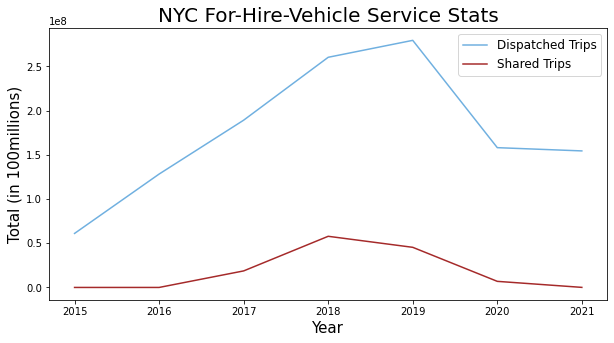

In [35]:
plt.figure(figsize = (10,5))
sns.lineplot(x = 'Year', y = 'Total Dispatched Trips', data = yearly_trip_totals, color = '#70B0E0')
sns.lineplot(x = 'Year', y = 'Total Dispatched Shared Trips', data = yearly_shared_trips_totals, color = 'brown')
plt.legend(labels=['Dispatched Trips', 'Shared Trips'], fontsize = 'large')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total (in 100millions)', fontsize = 15)
plt.title('NYC For-Hire-Vehicle Service Stats', fontsize = 20);

In [36]:
vehiclefig = fhv.groupby(['Year', 'Base Name'])['Unique Dispatched Vehicles'].sum().reset_index()

#I want to add layers to this next visual 
top3avg= fhv.groupby(['Base Name'])['Unique Dispatched Vehicles'].mean().reset_index()
top3avg = top3avg.sort_values(by = 'Unique Dispatched Vehicles', ascending = False).head(3).reset_index(drop = True)

top_3 = top3avg['Base Name']
top_3

0    UBER
1    LYFT
2    JUNO
Name: Base Name, dtype: object

In [37]:
# for loop to make categories

for index, company in enumerate(vehiclefig['Base Name']):
    if company in ['UBER']:
        vehiclefig.loc[index, 'Company'] = 'Uber'
    elif company in ['LYFT']:
        vehiclefig.loc[index, 'Company'] = 'Lyft'
    elif company in ['JUNO']:
        vehiclefig.loc[index, 'Company'] = 'Juno'

#Taking care of all the other companies
vehiclefig['Company'] = vehiclefig['Company'].fillna('Other')

#Finishing the dataframe
vehiclefig = vehiclefig.groupby(['Year', 'Company'])['Unique Dispatched Vehicles'].mean().reset_index()
vehiclefig

,Year,Company,Unique Dispatched Vehicles
0,2015,Lyft,43196.000000
1,2015,Other,350.722222
2,2015,Uber,239798.000000
3,2016,Juno,89110.000000
4,2016,Lyft,162843.000000
5,2016,Other,542.060163
6,2016,Uber,441948.000000
7,2017,Juno,211134.000000
8,2017,Lyft,332211.000000
9,2017,Other,532.969325


In [38]:
#Splitting up the company column for the visual
uberavg = vehiclefig.loc[vehiclefig['Company'] == 'Uber']
lyftavg = vehiclefig.loc[vehiclefig['Company'] == 'Lyft']
junoavg = vehiclefig.loc[vehiclefig['Company'] == 'Juno']
otheravg = vehiclefig.loc[vehiclefig['Company'] == 'Other']

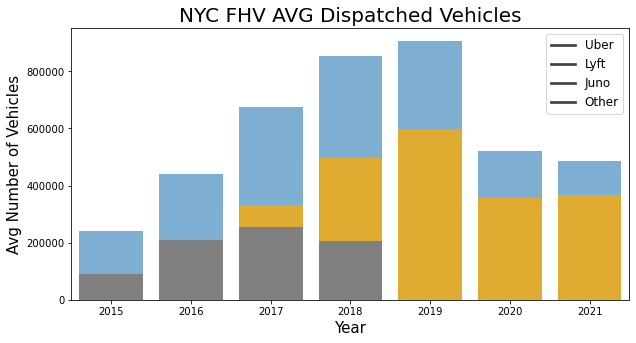

In [39]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Year', y = 'Unique Dispatched Vehicles', data = uberavg, color = '#70B0E0')
sns.barplot(x = 'Year', y = 'Unique Dispatched Vehicles', data = lyftavg, color = '#FCB714')
sns.barplot(x = 'Year', y = 'Unique Dispatched Vehicles', data = junoavg, color = '#808080')
sns.barplot(x = 'Year', y = 'Unique Dispatched Vehicles', data = otheravg, color = '#0EB194')
plt.legend([a, b['Uber', 'Lyft', 'Juno', 'Other'], fontsize = 'large')
plt.xlabel('Year', fontsize = 15,)
plt.ylabel('Avg Number of Vehicles', fontsize = 15)
plt.title('NYC FHV AVG Dispatched Vehicles', fontsize = 20);